## Load Log Files

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
directory = "./Logs/"
save_path = "./Saved/"

### Reload Log Files

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import pandas as pd
import numpy as np
import re
import os
import pickle
import sys
import random

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [6]:
n_clusters = 10

## Evaluate the Count Vectorizer Parameter

In [7]:
min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_val = 10

In [8]:
def features_param_metrics(logs, gram):
    vms = []
    fms = []
    for i in range(n_val):
        vmn = []
        fmn = []
        
        random_val = random.randint(1, 45)
        for min_df_val in min_df_vals:
            labels_ = log_labels
            
            X = get_features(logs, gram, min_df_val)
            X = X.toarray()
    
            idxs = np.where(np.all(X == 0, axis=1))

            X = np.delete(X, idxs, axis=0)
            labels_ = np.delete(labels_, idxs)

            kmeans = KMeans(init="k-means++", n_clusters=n_clusters, random_state=random_val).fit(X)
            labels = kmeans.labels_

            vm = evaluate_vmeasure(labels_, labels)
            vmn.append(vm)
            
            fm = evaluate_fm(labels_, labels)
            fmn.append(fm)
        
        vmn.append(random_val)
        fmn.append(random_val)
        
        vms.append(vmn)
        fms.append(fmn)
        
    return vms, fms
    
        

In [9]:
def find_best_param(vms, fms):
    vsums = np.sum(vms, axis=0)
    fsums = np.sum(fms, axis=0)
    
    print(np.argmin(np.std(vms, axis=0)))
    print(np.argmin(np.std(fms, axis=0)))
    
    return np.argmax(vsums/n_val), np.argmax(fsums/n_val)

In [10]:
def plot_features_performance(metrics, title):
    sns.set(style='white', context='poster', rc={'figure.figsize':(14,8)})
    plt.figure(0).clf()
    plt.title(title)
    i=0
    for mm in metrics:
        plt.plot(min_df_vals, mm, label=str(i))
        i+=1

        plt.legend(loc=0)


In [11]:
vms, fms = features_param_metrics(logs, 2)

In [13]:
header = min_df_vals[:] 
header.extend(["Seed"])

tab_results(header, vms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.8004997605432325 | 0.8101082504325119 | 0.8524867673534731 | 0.8419241004526611 | 0.8616142568087488 | 0.8465346083608345 | 0.8484996843175576 | 0.8422943974626459 | 0.8301181952169393 | 0.855593404062041  |  33  |
| 0.8756130497745258 | 0.8130677151795426 | 0.8807241239150123 | 0.8204753453450566 | 0.8817617523247165 | 0.842214114353783

In [14]:
tab_results(header, fms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.6495369403513355 | 0.681027487154568  | 0.7518549028718289 | 0.7017937058807954 | 0.7393820419310968 | 0.7179441298648095 | 0.7674259235943445 | 0.7567023122244896 | 0.720556225167451  | 0.7177282520585508 |  33  |
| 0.7932276824418301 | 0.664936284810088  | 0.7593634568716622 | 0.6796023825808521 | 0.7580584081071151 | 0.700094355593941

In [15]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

In [16]:
indvm, indfm

(9, 9)

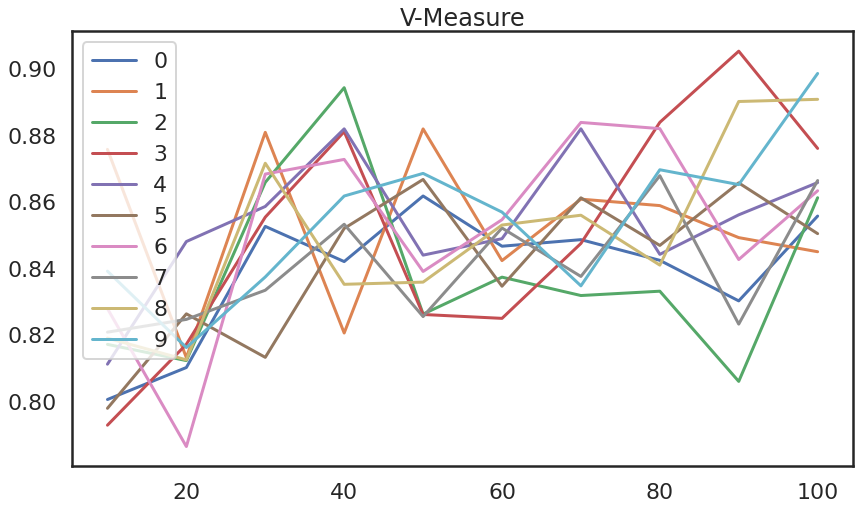

In [17]:
plot_features_performance(vms, "V-Measure")

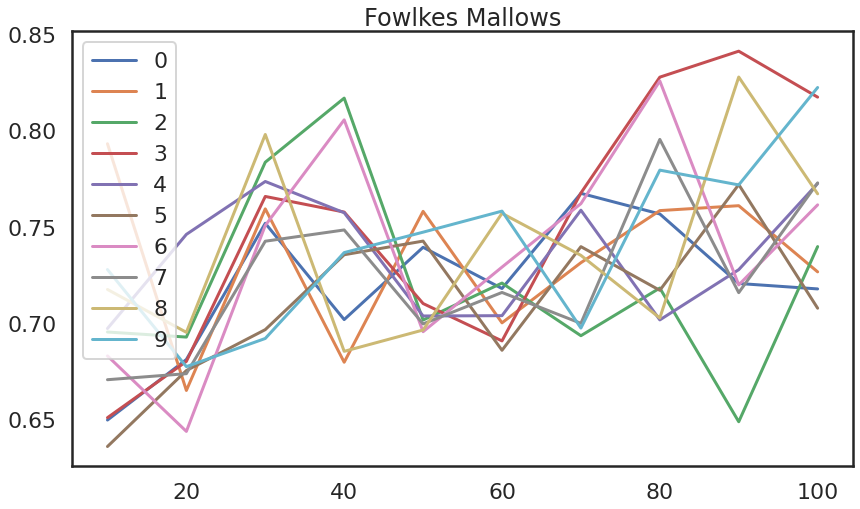

In [18]:
plot_features_performance(fms, "Fowlkes Mallows")

In [19]:
vms, fms = features_param_metrics(logs, 3)

In [20]:
header = min_df_vals[:]
header.extend(["Seed"])

tab_results(header, vms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.7947530753760869 | 0.8570353118870871 | 0.8461847894723462 | 0.8754791897272972 | 0.7936234709181804 | 0.8192049982286528 |  0.83559871177948  | 0.8707534572446087 | 0.8394949143159168 | 0.8599597576690226 |  41  |
| 0.8093475249060906 | 0.8075675937764903 | 0.8478574097720757 | 0.8180959307706398 | 0.8782863222657619 | 0.802105524795057

In [21]:
tab_results(header, fms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.6501978319408215 | 0.7573902635345637 | 0.6643955328521477 | 0.7497457629194357 | 0.6548782681821653 | 0.7182419762478353 | 0.7215385288365892 | 0.7795695732661546 | 0.7252925861562396 | 0.7168451049932708 |  41  |
| 0.6848107655717008 | 0.6683470502561569 | 0.7306323038982584 | 0.681972901759102  | 0.7514292190712011 | 0.647422238530830

In [22]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

In [23]:
indvm, indfm

(9, 9)

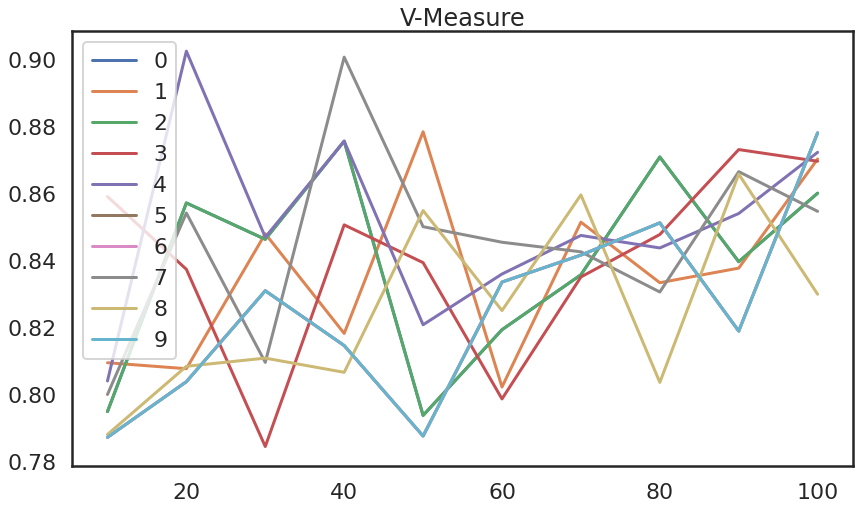

In [24]:
plot_features_performance(vms, "V-Measure")

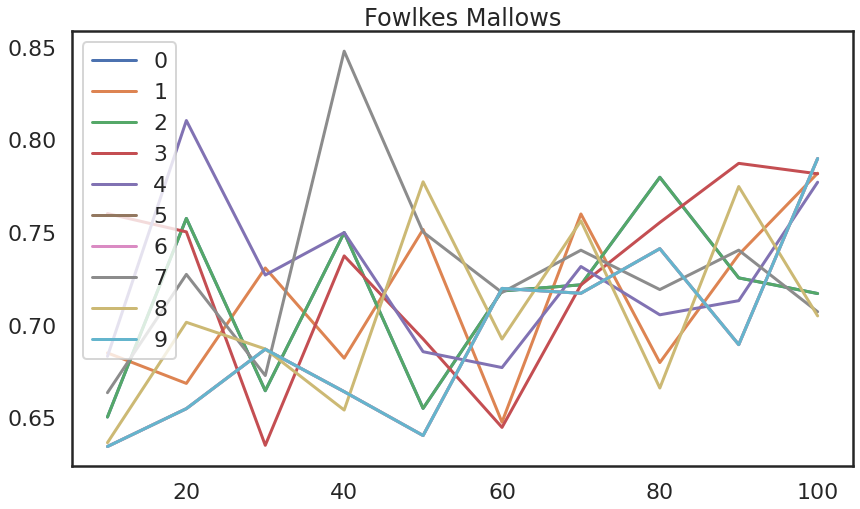

In [25]:
plot_features_performance(fms, "Fowlkes Mallows")

## Bigram Feature Vectorizer

In [22]:
eval_results = []

In [27]:
X = get_features(logs, 3, 0)

In [28]:
X.shape

(27093, 32036)

In [18]:
labels_ = log_labels
            
X = get_features(logs, 2, 100)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [19]:
X.shape

(27093, 1524)

In [20]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

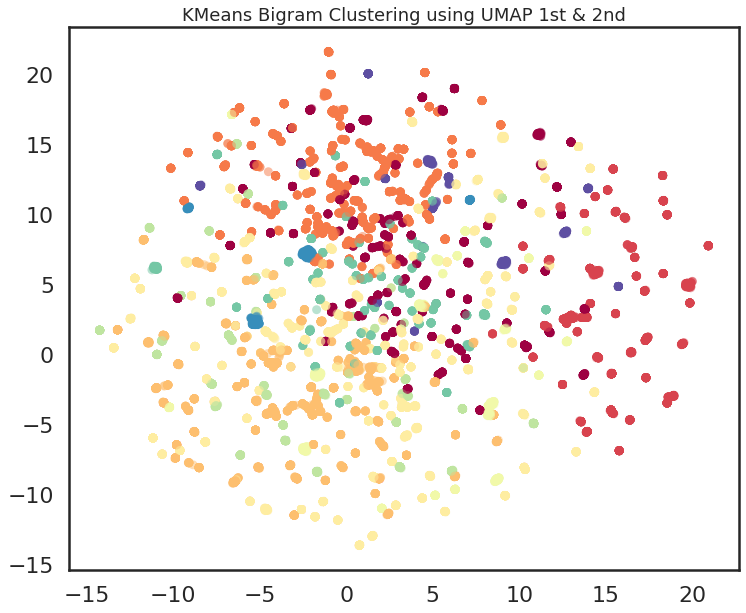

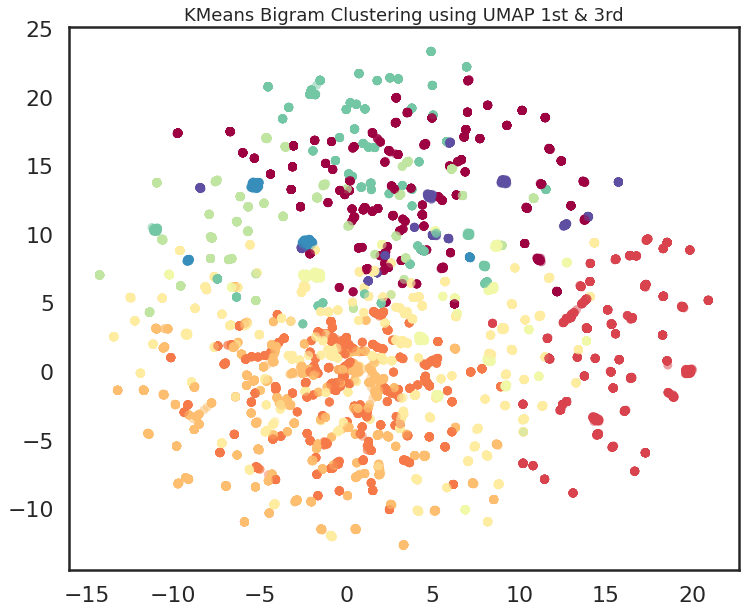

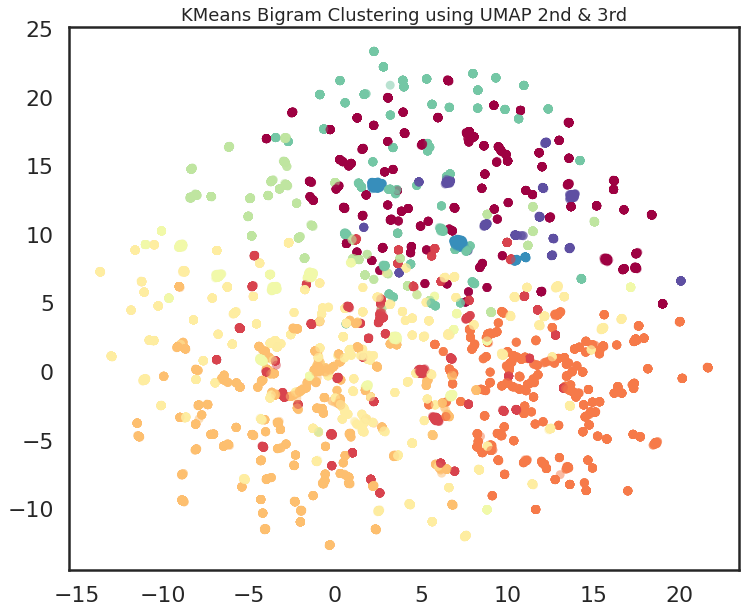

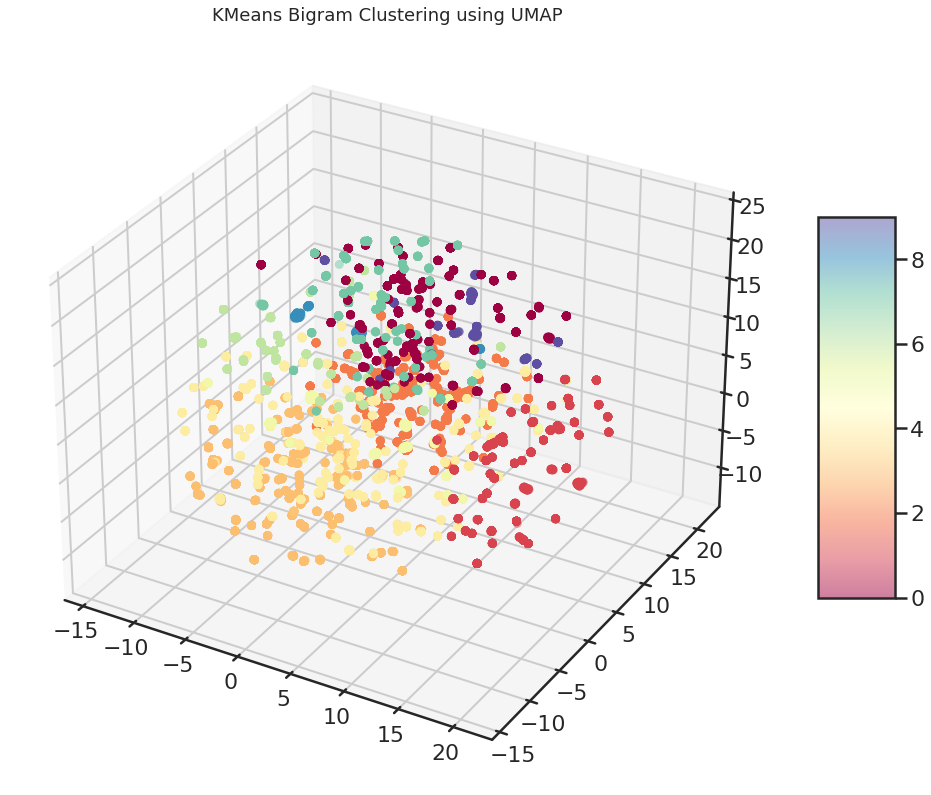

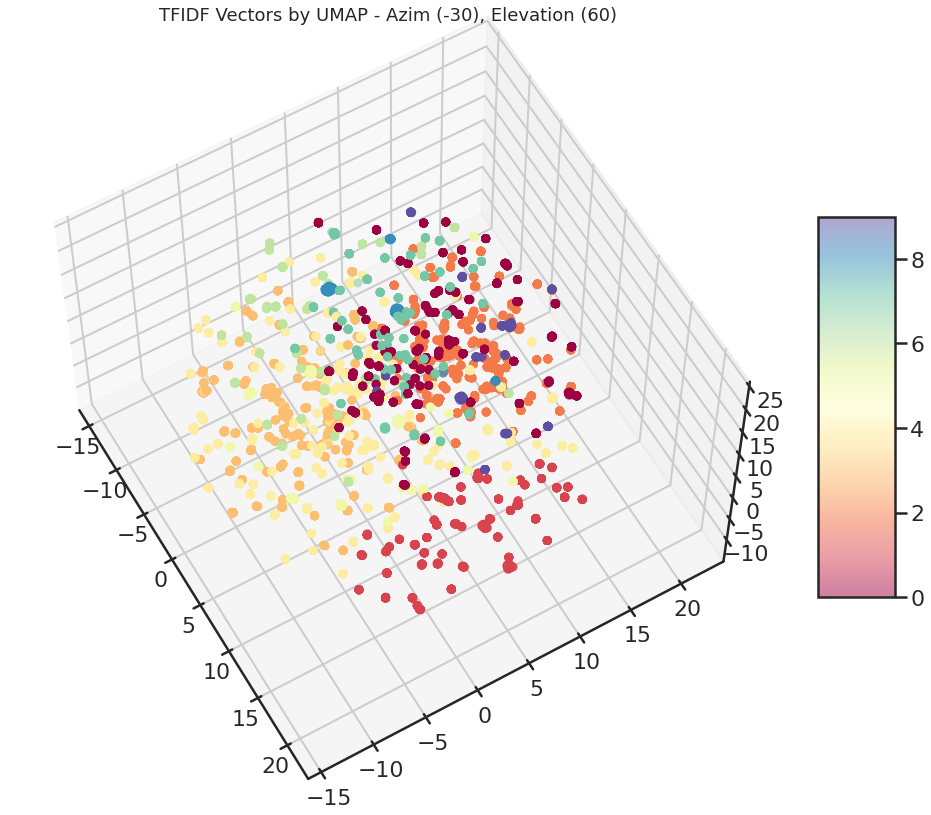

In [21]:
plot_clusters("KMeans Bigram Clustering using UMAP", X, labels)

In [16]:
results = evaluate_clustering('KMeans Bigram Clustering', X, labels_, labels)
print(results)

['KMeans Bigram Clustering', '0.83', '0.89', '0.86', '0.93', '0.69', '0.86', '0.74', '0.25']


In [17]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [18]:
labels_ = log_labels
            
X = get_features(logs, 3, 100)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [19]:
X.shape

(26737, 1926)

In [20]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

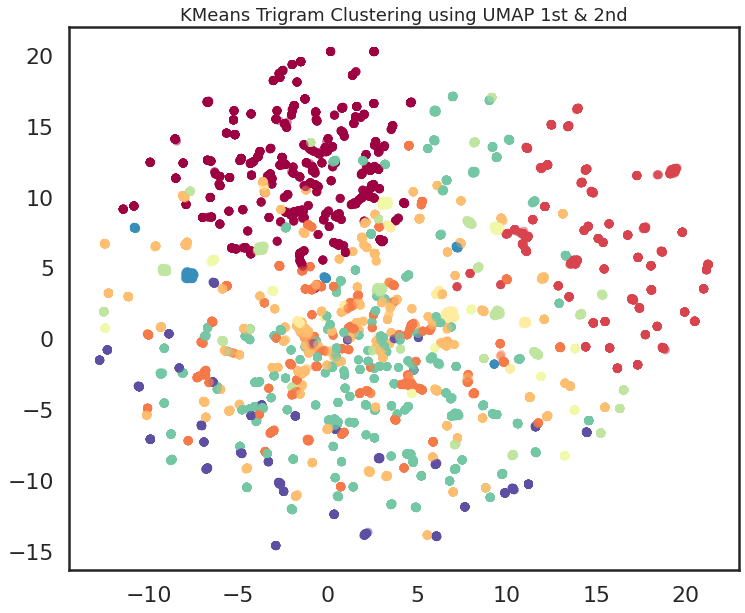

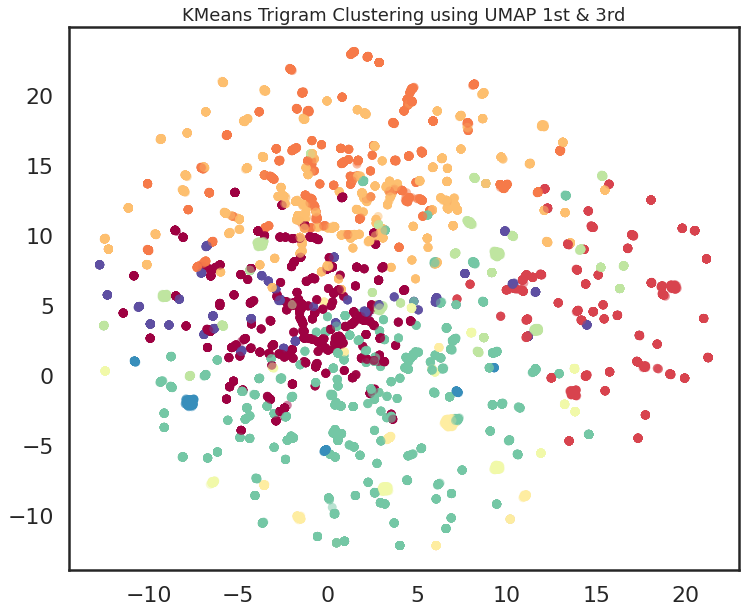

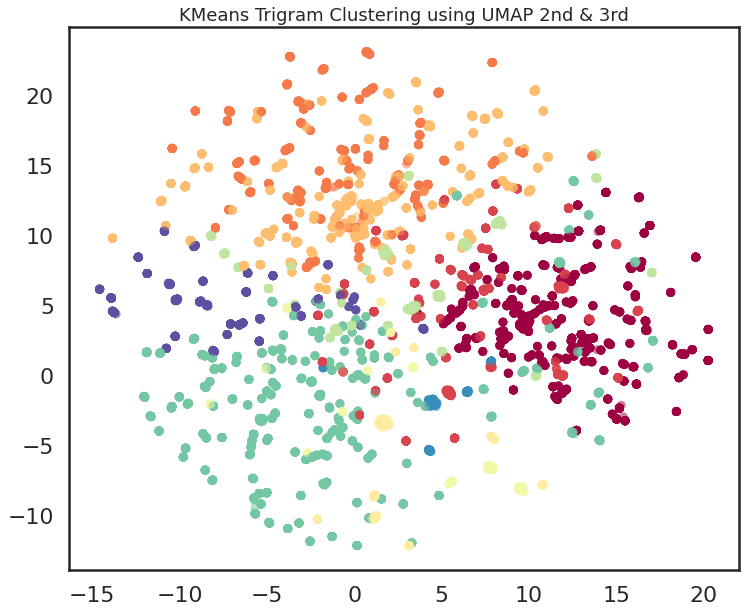

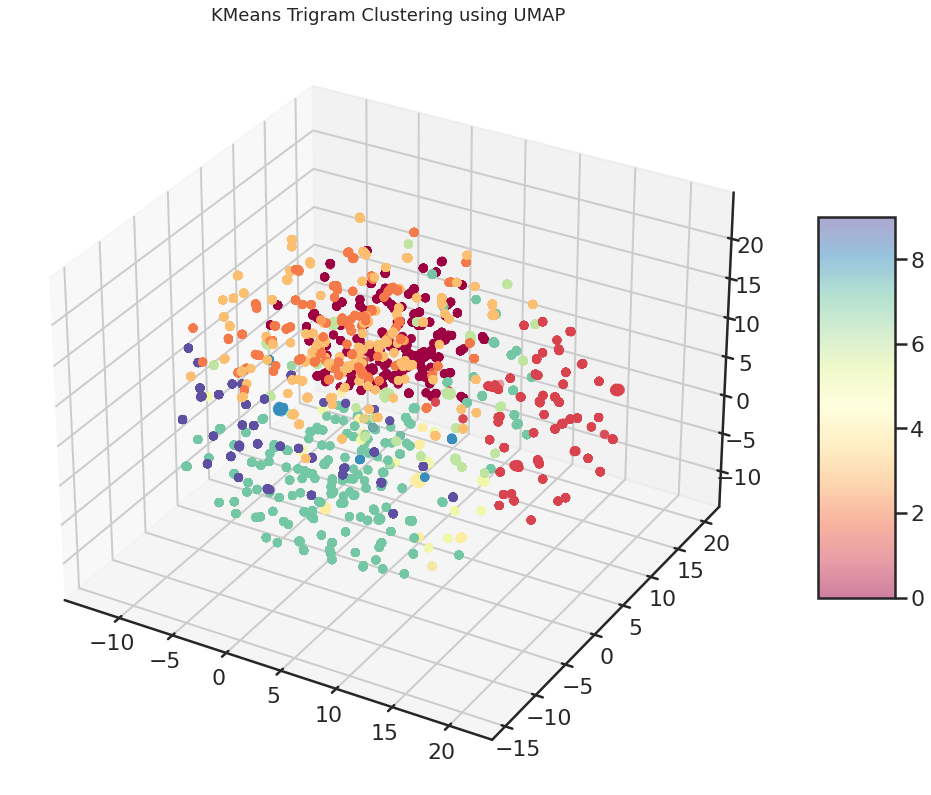

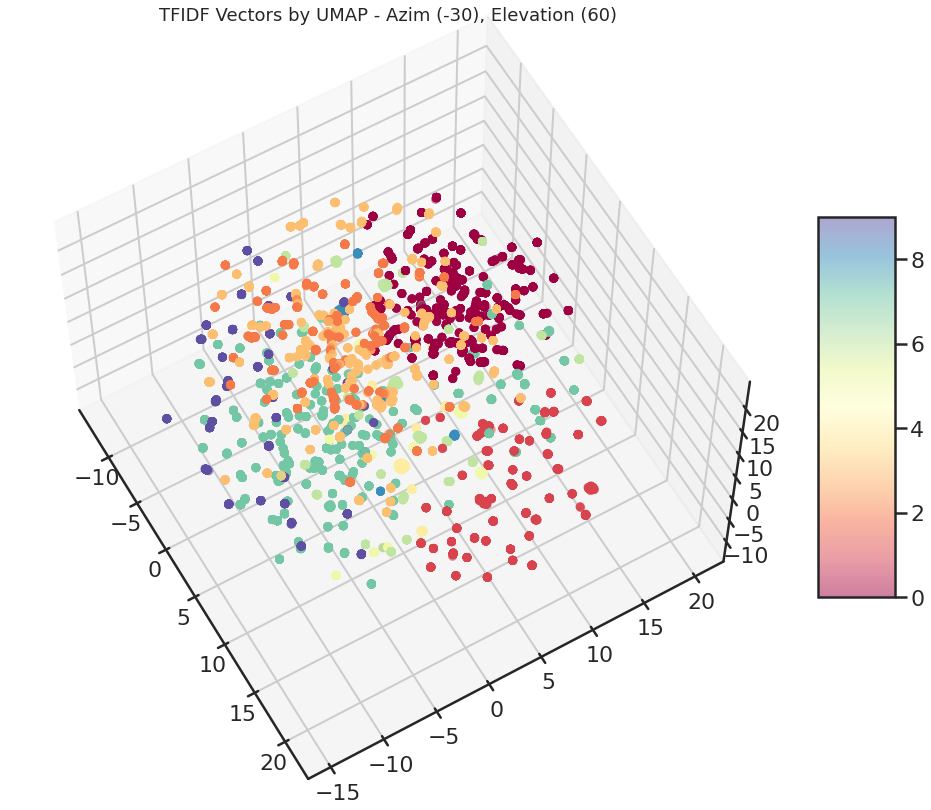

In [21]:
plot_clusters("KMeans Trigram Clustering using UMAP", X, labels)

In [22]:
results = evaluate_clustering('KMeans Trigram Clustering', X, labels_, labels)
print(results)

['KMeans Trigram Clustering', '0.85', '0.89', '0.87', '0.95', '0.75', '0.87', '0.78', '0.20']


In [23]:
eval_results.append(results)

In [24]:
tabulate_results(eval_results)

+---------------------------+-------------+--------------+-----------+------------+----------------+-------------------+-----------------+------------+
|            Name           | Homogeneity | Completeness | V Measure | Rand Score | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows | Silhouette |
+---------------------------+-------------+--------------+-----------+------------+----------------+-------------------+-----------------+------------+
|  KMeans Bigram Clustering |     0.83    |     0.89     |    0.86   |    0.93    |      0.69      |        0.86       |       0.74      |    0.25    |
| KMeans Trigram Clustering |     0.85    |     0.89     |    0.87   |    0.95    |      0.75      |        0.87       |       0.78      |    0.20    |
+---------------------------+-------------+--------------+-----------+------------+----------------+-------------------+-----------------+------------+


## Delete Below!

In [ ]:
tfidf_vectors = get_features(logs, 3, 100)

In [ ]:
tfidf_vectors.shape

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(tfidf_vectors)
labels = kmeans.labels_

In [ ]:
plot_clusters("KMeans Trigram Clustering using UMAP", tfidf_vectors, labels)

In [ ]:
results = evaluate_clustering('KMeans Trigram Clustering', tfidf_vectors, log_labels, labels)
print(results)

In [ ]:
eval_results.append(results)

## Trigram Vectorizer MinDF 30

In [ ]:
tfidf_vectors = get_features(logs, 3, 30)

In [ ]:
tfidf_vectors.shape

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(tfidf_vectors)
labels = kmeans.labels_

In [ ]:
plot_clusters("KMeans Trigram Clustering using UMAP", tfidf_vectors, labels)

In [ ]:
results = evaluate_clustering('KMeans Trigram Clustering (30)', tfidf_vectors, log_labels, labels)
print(results)

In [ ]:
eval_results.append(results)

## To Do

In [ ]:
use several evaluation metrics - dont use just one
try the trigram with only kmeans
put the results in a table for comparison - summarize and organize results 
transformation of the three devices
do the grid search

umap + matplotlib

In [ ]:
deliverables for next week

add the Fowlkes-Mallows scores metric to the evaluation
plot the v-measure and fowlkes-mallows score for different values of min_df (on both bigram and trigram) - going from 10 to 50 or 60. if the vmeasure and fowlkees-mallows dont agree, choose one. doing the plotting to show why the min_df chosen is the best option
keep best results of evaluation in table. proposal has ARI, NMI, F-M, H-C-V
be clear about the explanation of silhouette and db-score. make sure they are in a different table
write a grid search for the hierarchical algorithm - the grid search puts different parameters together and tries to determine the best one


In [ ]:
- implement a more systematic way of choosing the min_df parameter (ranking)
- density based
- hierarchical

In [ ]:
- Results & Discussion
    - visulaiztion, discussion
    - add link to code on github
- Conclusion
- Future Works

